In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
filename = "automobile_for_modeldev.csv"

df = pd.read_csv(filename, header=0)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### linear Regression

<b>Linear Function</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>




In [3]:
from sklearn.linear_model import LinearRegression

# LR object
lr = LinearRegression()
lr

LinearRegression()

In [4]:
X = df[["highway-mpg"]] # predictor
Y = df["price"]

In [5]:
# fitting the function 
lr.fit(X,Y)

LinearRegression()

<details>
<summary>What happens when you call .fit()</summary>
In the context of linear regression (and other machine learning models), the `.fit()` function is a method that is used to train the model on a given dataset. When you call the `.fit()` function, you are essentially telling the model to learn the patterns and relationships in the data so that it can make accurate predictions or estimations.

Specifically, in linear regression:

1. **Model Initialization:** Before calling `.fit()`, you have an initialized linear regression model with certain initial parameter values (like intercept and slope).

2. **Learning from Data:** When you call `.fit()` and provide it with your training data (input features and corresponding target values), the model adjusts its parameters (intercept and slope) to minimize the difference between the predicted values and the actual target values.

3. **Minimizing Residuals:** The main objective of the `.fit()` function is to find the best-fitting line that minimizes the sum of squared differences (residuals) between the predicted and actual target values. In other words, the model tries to find the line that best represents the relationship between the input features and the target variable.

4. **Optimization Algorithm:** Behind the scenes, the `.fit()` function uses an optimization algorithm (often gradient descent) to iteratively adjust the model parameters in the direction that reduces the prediction errors. The algorithm continues this process until it converges to a point where the model's performance is optimized.

5. **Learned Parameters:** Once the `.fit()` process is complete, the linear regression model has "learned" the optimal intercept and slope that define the best-fitting line for your data. These learned parameters are stored within the model and can be used for making predictions on new, unseen data.

In summary, the `.fit()` function in linear regression is responsible for adjusting the model's parameters to find the best-fitting line that minimizes the differences between predicted and actual target values. It's a crucial step in the process of training a linear regression model and making it capable of making accurate predictions based on new data.


```python




In [6]:
Yhat = lr.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
lr.intercept_

38423.3058581574

In [8]:
# slope
lr.coef_

array([-821.73337832])

$$
Yhat = a + b  X
$$

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>



## Multiple Linear Regression

In [9]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [10]:
lr.fit(Z , df["price"])

LinearRegression()

In [11]:
lr.intercept_

-15806.624626329209

In [12]:
lr.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


## Model Evaluation using Visualization

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

for simple linear regression the best way to visualize is by using regression plots 

(0.0, 48155.51204613124)

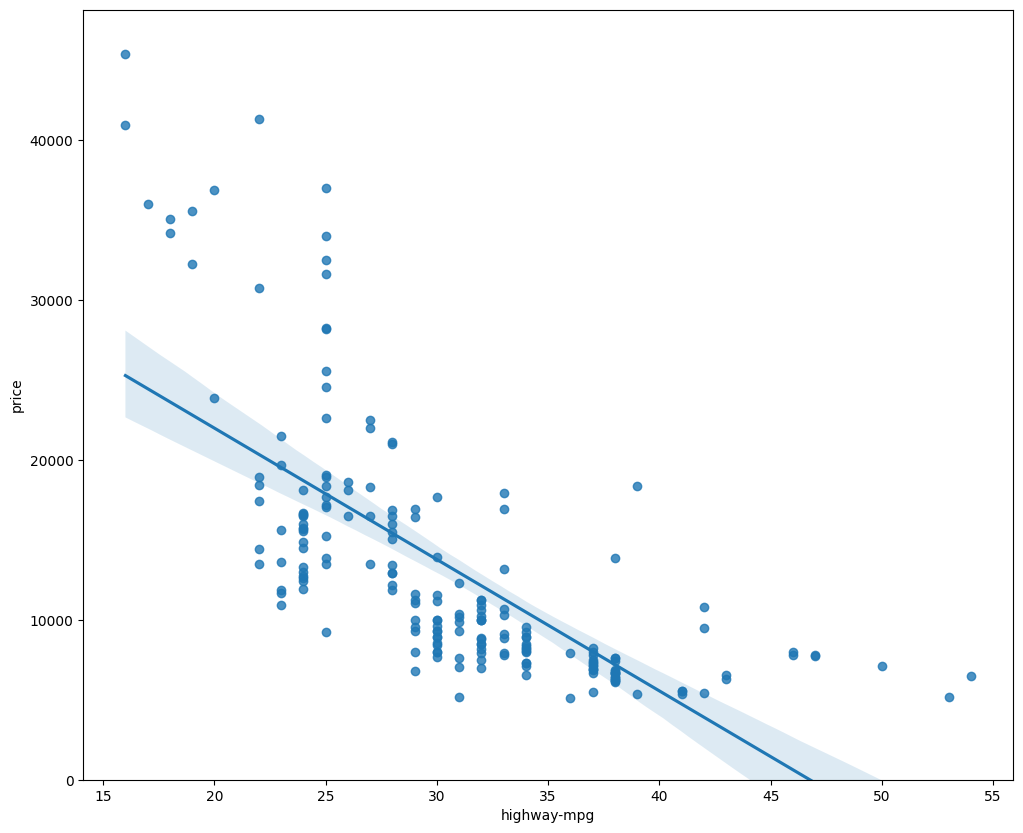

In [14]:
# highway mpg

width = 12
height = 10
plt.figure(figsize=(width, height))

sns.regplot(x="highway-mpg", y="price", data = df)

plt.ylim(0, )

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


<Axes: xlabel='peak-rpm', ylabel='price'>

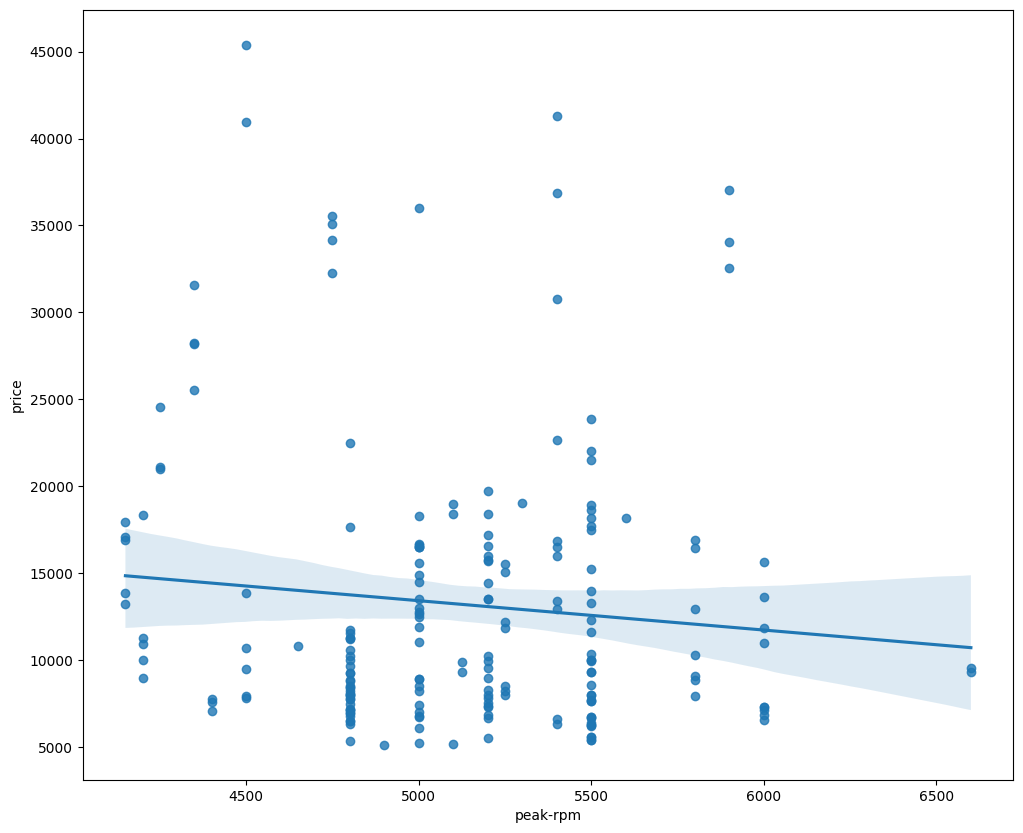

In [15]:
plt.figure(figsize=(width,height))

sns.regplot(x= "peak-rpm" , y = "price", data = df )

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>



<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


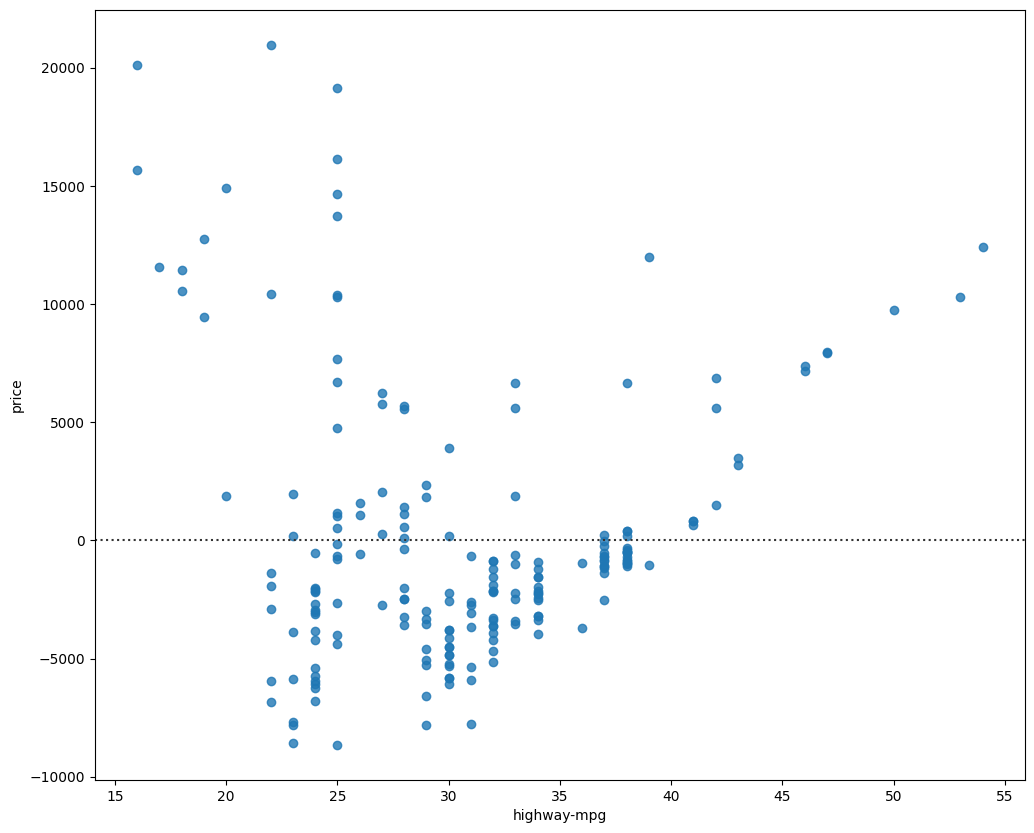

In [16]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

visualising Multiple linear regression (distribution Plots )

In [18]:
Y_hat = lr.predict(Z)


/tmp/ipykernel_252/4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/tmp/ipykernel_252/4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values

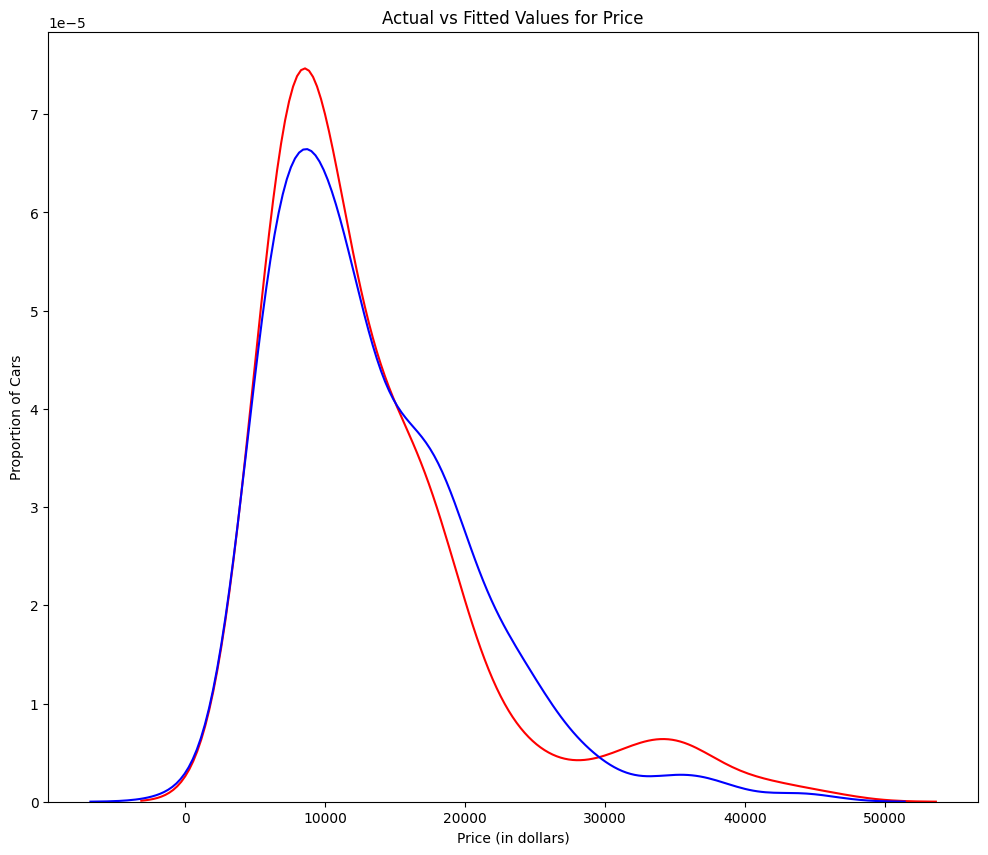

In [19]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


## Polynomial reggression 

In [20]:
x = df['highway-mpg']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


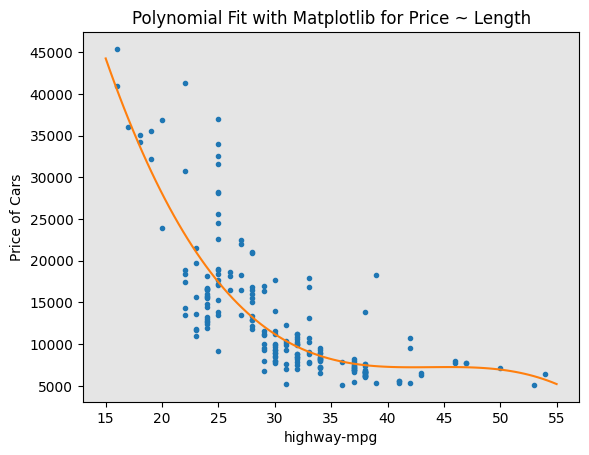

In [22]:
# function to plot polly
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

PlotPolly(p, x, y, 'highway-mpg')

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


## Pipelines 

<h2> Measures for In-Sample Evaluation</h2>


# Decision Making 